<a href="https://colab.research.google.com/github/weibb123/Beyond_ElbowMethod/blob/main/Beyond_Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Beyond Elbow Method to identify k clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


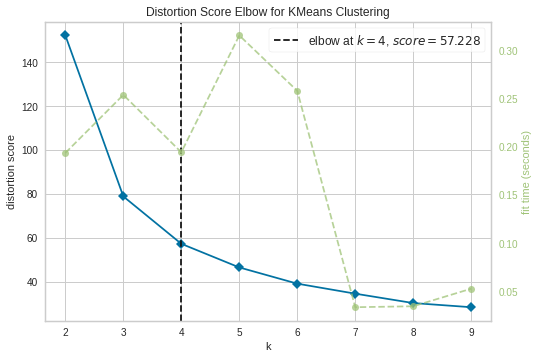

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
!pip install yellowbrick

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


# Instantiate KMeans Model and visualizer
km = KMeans(random_state=42)
visual = KElbowVisualizer(km, k=(2,10))

visual.fit(X)
visual.show()

So Elbow Method gives us K=4. But it seems like K=3 is reasonable as well. Let's try the Silhoutte plot method.

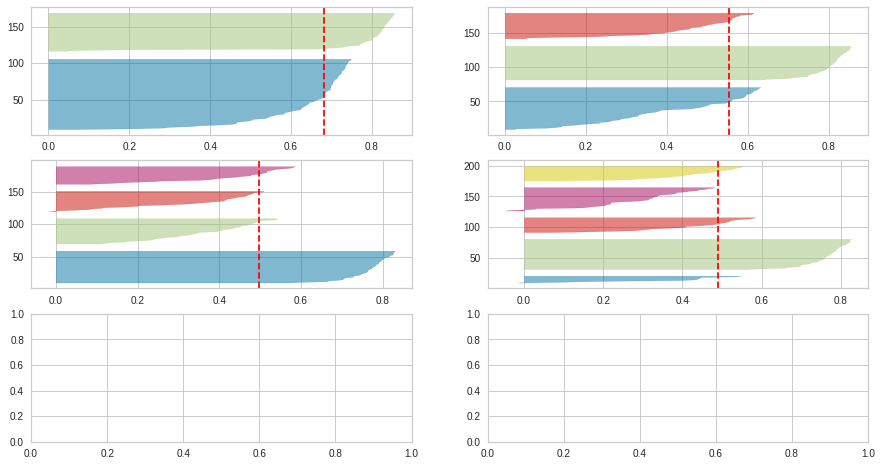

In [6]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

## Choosing optimal K

To pick the right K..

all the clusters should go over the red lines.

Size of all clusters should relative be similar or equal..

From this graph, K = 3 is the best choice.

In [9]:
import plotly.graph_objects as py

## K-MEANS USING K = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D PLOT
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = py.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = py.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = py.Figure(data = data, layout = layout)
fig.show()